# 1. Import lib


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

pd.set_option("display.float_format", "{:.1f}".format)

# Add data


In [61]:
df = pd.read_csv('movies_data_processed.csv')
df

,name,genres,type,rating,no_of_votes,meta_score,release_date,gross,budget,countries,url,ROI,result
0,Attack on Titan,"Action Epic, Adult Animation, Anime, Shōnen, S...",TV Series,9.1,591000.0,NaN,2013.0,NaN,NaN,Japan,https://www.imdb.com/title/tt2560140/?ref_=sr_...,NaN,Success
1,Love Hurts,"Martial Arts, Action, Comedy",Movie,5.3,6800.0,34.0,2025.0,17235040.0,18000000.0,United States,https://www.imdb.com/title/tt30788842/?ref_=sr...,-0.0,Fail
2,The Quick and the Dead,"Action, Drama, Romance, Thriller, Western",Movie,6.5,107000.0,49.0,1995.0,18636537.0,32000000.0,"United States, Japan",https://www.imdb.com/title/tt0114214/?ref_=sr_...,-0.4,Success
3,The Equalizer,"Cop Drama, Police Procedural, Action, Crime, D...",TV Series,5.6,19000.0,NaN,2021.0,NaN,NaN,United States,https://www.imdb.com/title/tt11242246/?ref_=sr...,NaN,Fail
4,Goosebumps,"Teen Horror, Action, Adventure, Comedy, Drama,...",TV Series,6.7,15000.0,NaN,2023.0,NaN,NaN,"United States, Canada, France",https://www.imdb.com/title/tt17720272/?ref_=sr...,NaN,Fail
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7989,Chuka,Western,Movie,6.3,1100.0,NaN,1967.0,NaN,NaN,United States,https://www.imdb.com/title/tt0061477/?ref_=sr_...,NaN,Fail
7990,Unforgiven,"Period Drama, Tragedy, Drama, Western",Movie,8.2,451000.0,85.0,1992.0,159167799.0,14400000.0,United States,https://www.imdb.com/title/tt0105695/?ref_=sr_t_3,10.1,Success
7991,The Duel,"Drama, Western",Movie,5.8,12000.0,42.0,2016.0,20672.0,10000000.0,United States,https://www.imdb.com/title/tt2436682/?ref_=sr_...,-1.0,Fail
7992,Calamity Jane,"Classic Musical, Musical, Romance, Western",Movie,7.2,11000.0,74.0,1953.0,7150.0,NaN,United States,https://www.imdb.com/title/tt0045591/?ref_=sr_...,NaN,Success


In [62]:
df.head()

,name,genres,type,rating,no_of_votes,meta_score,release_date,gross,budget,countries,url,ROI,result
0,Attack on Titan,"Action Epic, Adult Animation, Anime, Shōnen, S...",TV Series,9.1,591000.0,NaN,2013.0,NaN,NaN,Japan,https://www.imdb.com/title/tt2560140/?ref_=sr_...,NaN,Success
1,Love Hurts,"Martial Arts, Action, Comedy",Movie,5.3,6800.0,34.0,2025.0,17235040.0,18000000.0,United States,https://www.imdb.com/title/tt30788842/?ref_=sr...,-0.0,Fail
2,The Quick and the Dead,"Action, Drama, Romance, Thriller, Western",Movie,6.5,107000.0,49.0,1995.0,18636537.0,32000000.0,"United States, Japan",https://www.imdb.com/title/tt0114214/?ref_=sr_...,-0.4,Success
3,The Equalizer,"Cop Drama, Police Procedural, Action, Crime, D...",TV Series,5.6,19000.0,NaN,2021.0,NaN,NaN,United States,https://www.imdb.com/title/tt11242246/?ref_=sr...,NaN,Fail
4,Goosebumps,"Teen Horror, Action, Adventure, Comedy, Drama,...",TV Series,6.7,15000.0,NaN,2023.0,NaN,NaN,"United States, Canada, France",https://www.imdb.com/title/tt17720272/?ref_=sr...,NaN,Fail


In [63]:
df.isnull().sum()

name               0
genres             0
type               0
rating           244
no_of_votes      244
meta_score      4348
release_date      58
gross           4461
budget          4887
countries         36
url                0
ROI             5140
result             0
dtype: int64

In [64]:
df.dtypes

name             object
genres           object
type             object
rating          float64
no_of_votes     float64
meta_score      float64
release_date    float64
gross           float64
budget          float64
countries        object
url              object
ROI             float64
result           object
dtype: object

Điều kiện để dánh giá phim tốt <br>
rating > 7.5 <br>
meta_score > 72 <br>

# 2. Phân tích data theo địa lý và quốc gia sản xuất (Phần 3)

In [65]:
df

,name,genres,type,rating,no_of_votes,meta_score,release_date,gross,budget,countries,url,ROI,result
0,Attack on Titan,"Action Epic, Adult Animation, Anime, Shōnen, S...",TV Series,9.1,591000.0,NaN,2013.0,NaN,NaN,Japan,https://www.imdb.com/title/tt2560140/?ref_=sr_...,NaN,Success
1,Love Hurts,"Martial Arts, Action, Comedy",Movie,5.3,6800.0,34.0,2025.0,17235040.0,18000000.0,United States,https://www.imdb.com/title/tt30788842/?ref_=sr...,-0.0,Fail
2,The Quick and the Dead,"Action, Drama, Romance, Thriller, Western",Movie,6.5,107000.0,49.0,1995.0,18636537.0,32000000.0,"United States, Japan",https://www.imdb.com/title/tt0114214/?ref_=sr_...,-0.4,Success
3,The Equalizer,"Cop Drama, Police Procedural, Action, Crime, D...",TV Series,5.6,19000.0,NaN,2021.0,NaN,NaN,United States,https://www.imdb.com/title/tt11242246/?ref_=sr...,NaN,Fail
4,Goosebumps,"Teen Horror, Action, Adventure, Comedy, Drama,...",TV Series,6.7,15000.0,NaN,2023.0,NaN,NaN,"United States, Canada, France",https://www.imdb.com/title/tt17720272/?ref_=sr...,NaN,Fail
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7989,Chuka,Western,Movie,6.3,1100.0,NaN,1967.0,NaN,NaN,United States,https://www.imdb.com/title/tt0061477/?ref_=sr_...,NaN,Fail
7990,Unforgiven,"Period Drama, Tragedy, Drama, Western",Movie,8.2,451000.0,85.0,1992.0,159167799.0,14400000.0,United States,https://www.imdb.com/title/tt0105695/?ref_=sr_t_3,10.1,Success
7991,The Duel,"Drama, Western",Movie,5.8,12000.0,42.0,2016.0,20672.0,10000000.0,United States,https://www.imdb.com/title/tt2436682/?ref_=sr_...,-1.0,Fail
7992,Calamity Jane,"Classic Musical, Musical, Romance, Western",Movie,7.2,11000.0,74.0,1953.0,7150.0,NaN,United States,https://www.imdb.com/title/tt0045591/?ref_=sr_...,NaN,Success


## Phân tích tổng quan:


### Quốc gia có doanh thu cao nhất

In [66]:
# Tách các quốc gia (nếu có nhiều quốc gia trong một ô)
df['countries'] = df['countries'].str.split(', ')
df = df.explode('countries')

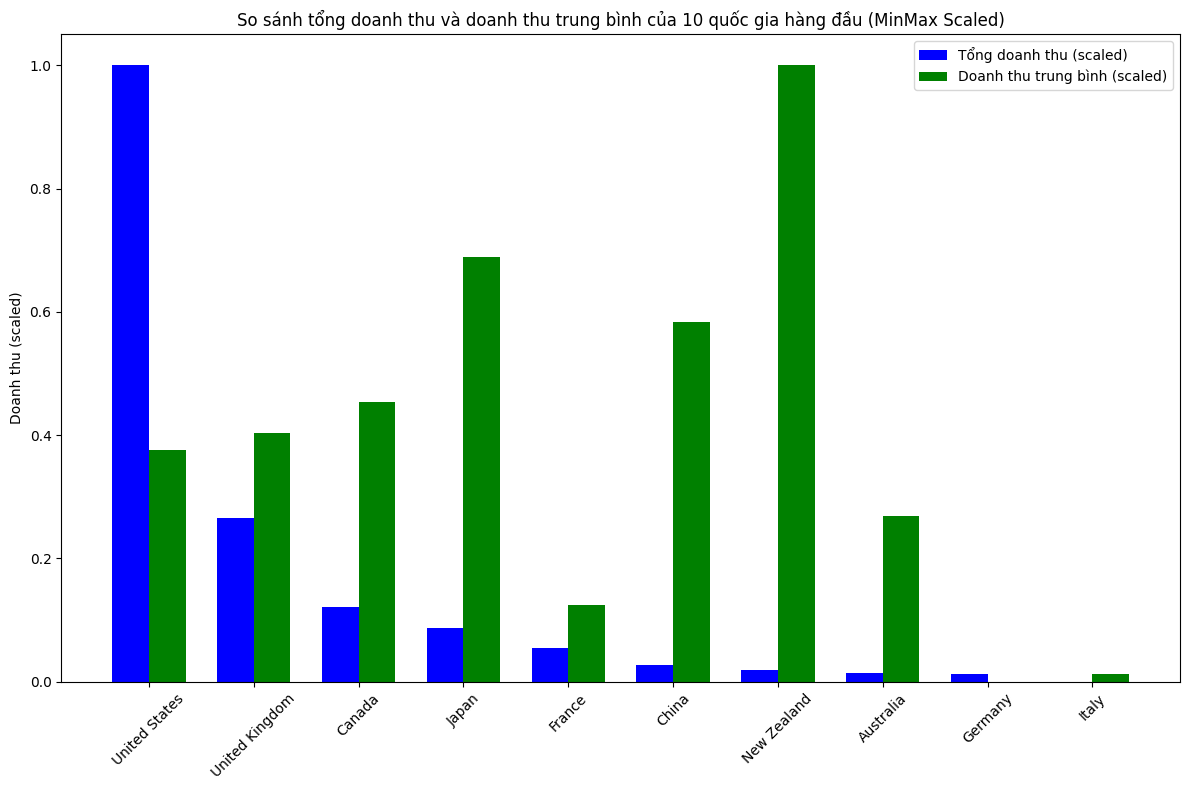


Thống kê chi tiết theo quốc gia:
                Tổng doanh thu  Doanh thu trung bình  Số lượng phim
countries                                                          
United States   702627797223.0           221509393.8           3172
United Kingdom  197591484358.0           228958846.3            863
Canada           98654798297.0           242395081.8            407
Japan            74834730220.0           305447878.4            245
France           52536721312.0           154066631.4            341
...                        ...                   ...            ...
Slovenia              711676.0              711676.0              1
Malaysia              637370.0              637370.0              1
Benin                 569675.0              569675.0              1
Senegal               569675.0              569675.0              1
Vietnam               454023.0              454023.0              1

[86 rows x 3 columns]


In [77]:
# Tạo DataFrame tổng hợp
country_stats = df.groupby('countries').agg({
    'gross': ['sum', 'mean', 'count']
}).round(2).dropna()

# Đổi tên cột cho dễ đọc
country_stats.columns = ['Tổng doanh thu', 'Doanh thu trung bình', 'Số lượng phim']
country_stats = country_stats.sort_values('Tổng doanh thu', ascending=False)

# Lấy 10 quốc gia có doanh thu cao nhất
top_10_countries = country_stats.head(10)

# Sử dụng MinMaxScaler từ sklearn để chuẩn hóa dữ liệu
scaler = MinMaxScaler()

# Chuẩn hóa dữ liệu
total_revenue_scaled = scaler.fit_transform(top_10_countries[['Tổng doanh thu']])
avg_revenue_scaled = scaler.fit_transform(top_10_countries[['Doanh thu trung bình']])

# Tạo biểu đồ cột
fig, ax = plt.subplots(figsize=(12, 8))

x = np.arange(len(top_10_countries))
width = 0.35

# Vẽ 2 cột cạnh nhau
rects1 = ax.bar(x - width/2, total_revenue_scaled.flatten(),
                width, label='Tổng doanh thu (scaled)', color='blue')
rects2 = ax.bar(x + width/2, avg_revenue_scaled.flatten(), 
                width, label='Doanh thu trung bình (scaled)', color='green')

# Tùy chỉnh biểu đồ
ax.set_ylabel('Doanh thu (scaled)')
ax.set_title('So sánh tổng doanh thu và doanh thu trung bình của 10 quốc gia hàng đầu (MinMax Scaled)')
ax.set_xticks(x)
ax.set_xticklabels(top_10_countries.index, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

# In bảng thống kê
print("\nThống kê chi tiết theo quốc gia:")
print(country_stats)

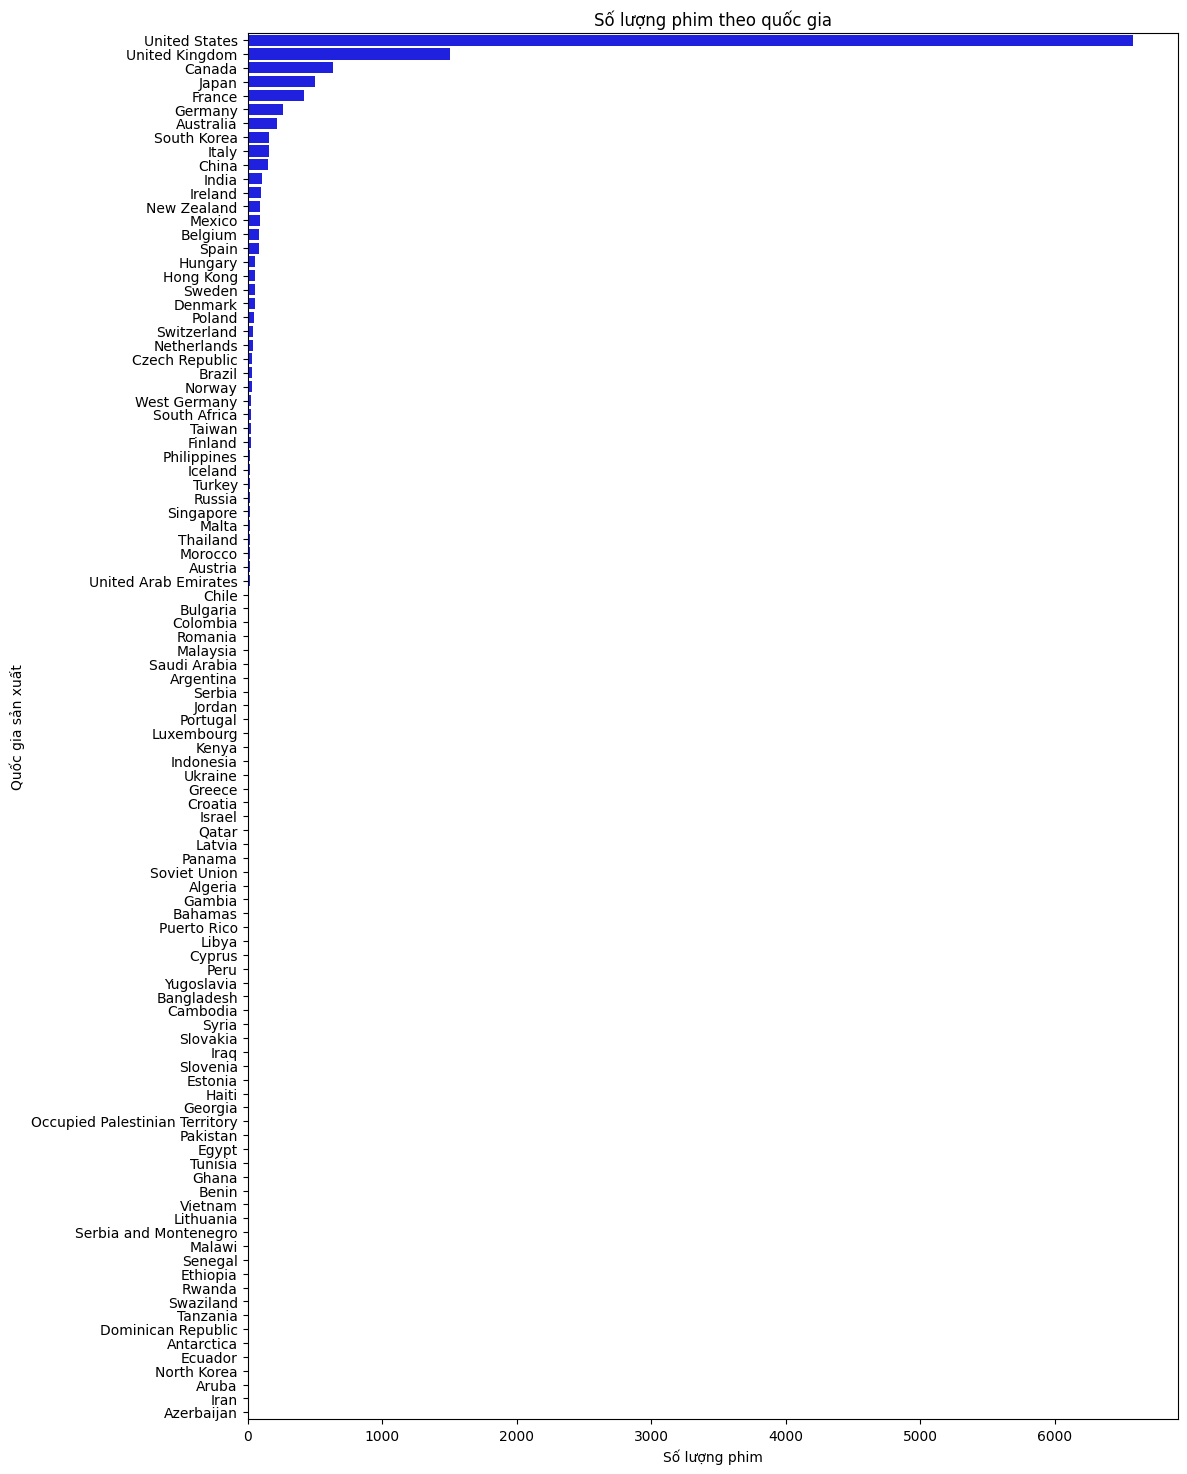

In [68]:
#Thống kê số lượng phim theo quốc gia
top_countries = df['countries'].value_counts()
plt.figure(figsize=(12, 18))
sns.barplot(x=top_countries.values, y=top_countries.index, color= 'blue')
plt.title("Số lượng phim theo quốc gia")
plt.xlabel("Số lượng phim")
plt.ylabel("Quốc gia sản xuất")
plt.show()


USA là nước sản xuất phim lớn nhất thể giới.

### Nhận xét:
- USA có tổng danh thu cao nhất nhờ có số lượng phim lơn nhất nhưng danh thu mỗi phim ko đồng đều dẫn đến danh thu trung bình ko cao. <br>

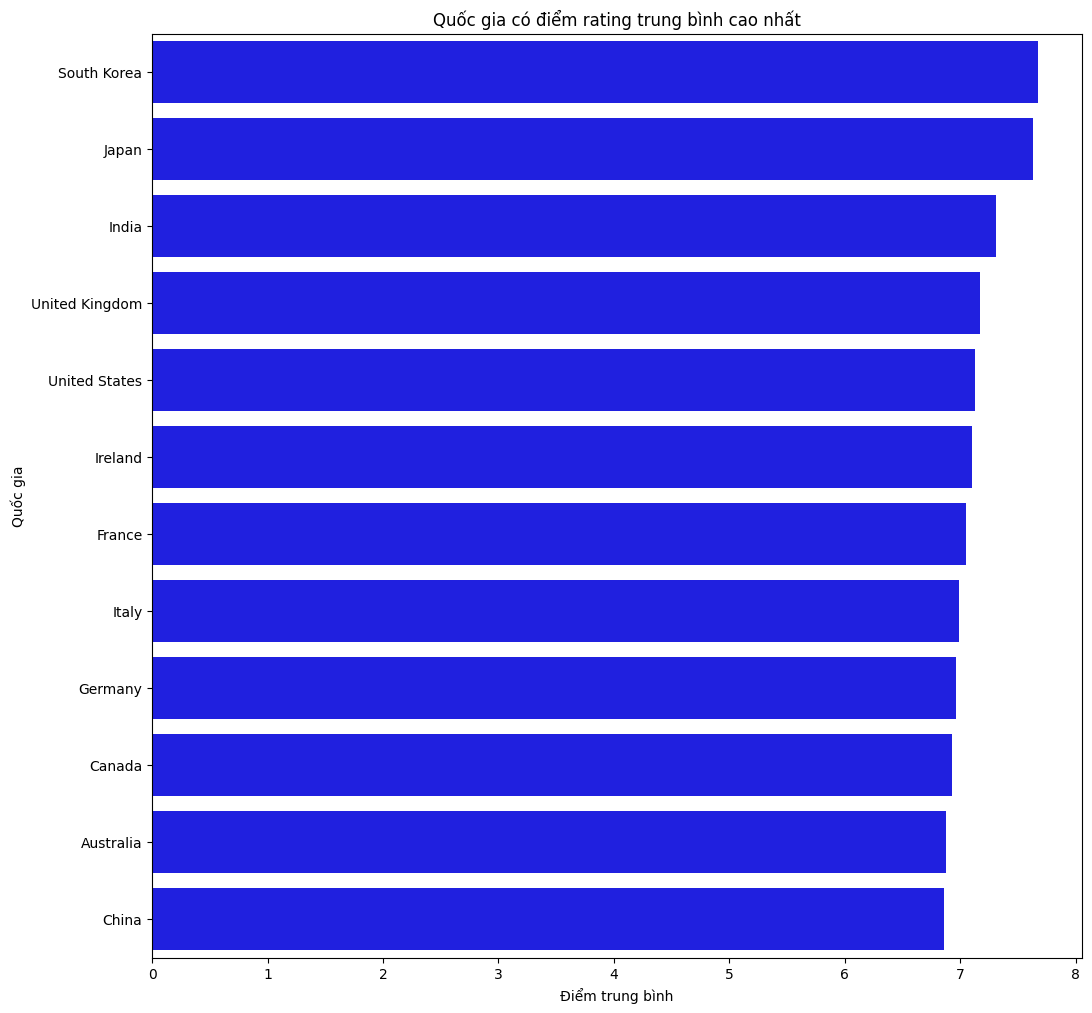

In [69]:
# Tính số lượng phim theo quốc gia
country_counts = df['countries'].value_counts()

# Lọc các quốc gia có ít nhất 100 phim
selected_countries = country_counts[country_counts >= 100].index

# Lọc dữ liệu chỉ bao gồm các quốc gia đã chọn
filtered_df = df[df['countries'].isin(selected_countries)]

# Tính rating trung bình theo quốc gia
country_ratings = filtered_df.groupby('countries')['rating'].mean().sort_values(ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(12, 12))
sns.barplot(x=country_ratings.values, y=country_ratings.index, color='blue')
plt.title("Quốc gia có điểm rating trung bình cao nhất")
plt.xlabel("Điểm trung bình")
plt.ylabel("Quốc gia")
plt.show()

Tuy nhiên, điểm đánh gia cao nhất lại thuộc về các nước châu Á <br>
Chọn ra các nước có ảnh hướng lớn đến ngành công nghiệp phim để phân tích: <br>
- United States (Mỹ) <br>
- United Kingdom (Anh) <br>
- South Korea (Hàn Quốc) <br>
- Japan (Nhật Bản) <br>
- India (Ấn Độ) <br>
- France (Pháp) <br>
Việt Nam có quá ít dữ liệu

In [70]:
# Chọn ra các quốc gia tiêu biểu theo số lượng và rate
selected_countries = ['United States', 'United Kingdom', 'South Korea', 'Japan', 'India', 'France']

# Lọc dữ liệu chỉ bao gồm các quốc gia đã chọn
filtered_df = df[df['countries'].isin(selected_countries)]
filtered_df

,name,genres,type,rating,no_of_votes,meta_score,release_date,gross,budget,countries,url,ROI,result
0,Attack on Titan,"Action Epic, Adult Animation, Anime, Shōnen, S...",TV Series,9.1,591000.0,NaN,2013.0,NaN,NaN,Japan,https://www.imdb.com/title/tt2560140/?ref_=sr_...,NaN,Success
1,Love Hurts,"Martial Arts, Action, Comedy",Movie,5.3,6800.0,34.0,2025.0,17235040.0,18000000.0,United States,https://www.imdb.com/title/tt30788842/?ref_=sr...,-0.0,Fail
2,The Quick and the Dead,"Action, Drama, Romance, Thriller, Western",Movie,6.5,107000.0,49.0,1995.0,18636537.0,32000000.0,United States,https://www.imdb.com/title/tt0114214/?ref_=sr_...,-0.4,Success
2,The Quick and the Dead,"Action, Drama, Romance, Thriller, Western",Movie,6.5,107000.0,49.0,1995.0,18636537.0,32000000.0,Japan,https://www.imdb.com/title/tt0114214/?ref_=sr_...,-0.4,Success
3,The Equalizer,"Cop Drama, Police Procedural, Action, Crime, D...",TV Series,5.6,19000.0,NaN,2021.0,NaN,NaN,United States,https://www.imdb.com/title/tt11242246/?ref_=sr...,NaN,Fail
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7989,Chuka,Western,Movie,6.3,1100.0,NaN,1967.0,NaN,NaN,United States,https://www.imdb.com/title/tt0061477/?ref_=sr_...,NaN,Fail
7990,Unforgiven,"Period Drama, Tragedy, Drama, Western",Movie,8.2,451000.0,85.0,1992.0,159167799.0,14400000.0,United States,https://www.imdb.com/title/tt0105695/?ref_=sr_t_3,10.1,Success
7991,The Duel,"Drama, Western",Movie,5.8,12000.0,42.0,2016.0,20672.0,10000000.0,United States,https://www.imdb.com/title/tt2436682/?ref_=sr_...,-1.0,Fail
7992,Calamity Jane,"Classic Musical, Musical, Romance, Western",Movie,7.2,11000.0,74.0,1953.0,7150.0,NaN,United States,https://www.imdb.com/title/tt0045591/?ref_=sr_...,NaN,Success


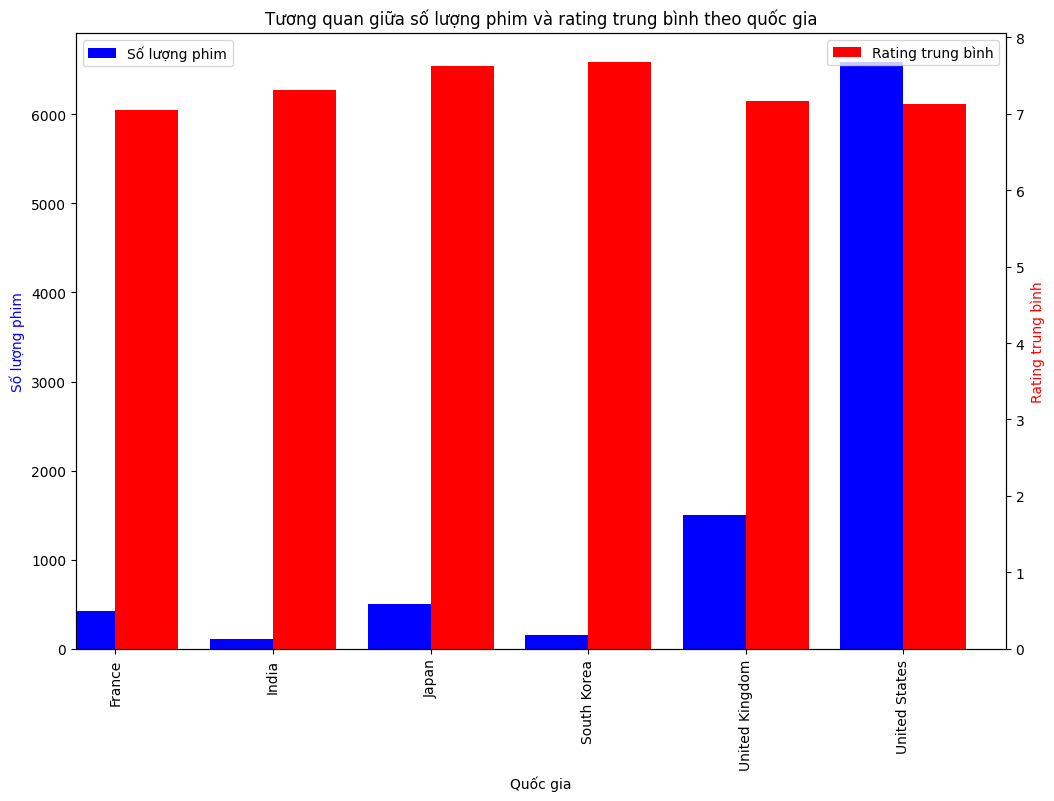

In [71]:
# Tính số lượng phim theo quốc gia
country_counts = filtered_df['countries'].value_counts()

# Tính rating trung bình theo quốc gia
country_ratings = filtered_df.groupby('countries')['rating'].mean()

# Tạo DataFrame mới từ 2 Series đã tính
country_df = pd.DataFrame({'number_of_movies': country_counts, 'average_rating': country_ratings})

# Vẽ biểu đồ cột đôi
fig, ax1 = plt.subplots(figsize=(12, 8))

# Vẽ cột số lượng phim
country_df['number_of_movies'].plot(kind='bar', color='b', ax=ax1, position=1, width=0.4, label='Số lượng phim')
ax1.set_ylabel('Số lượng phim', color='b')
ax1.set_xlabel('Quốc gia')
ax1.set_title("Tương quan giữa số lượng phim và rating trung bình theo quốc gia")

# Tạo trục y thứ hai cho rating trung bình
ax2 = ax1.twinx() # tạo cột chung với cột số lượng phim
country_df['average_rating'].plot(kind='bar', color='r', ax=ax2, position=0, width=0.4, label='Rating trung bình')
ax2.set_ylabel('Rating trung bình', color='r')

# Thêm chú thích
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Xoay tên quốc gia để hiển thị ngang
plt.xticks(rotation=0)

plt.show()

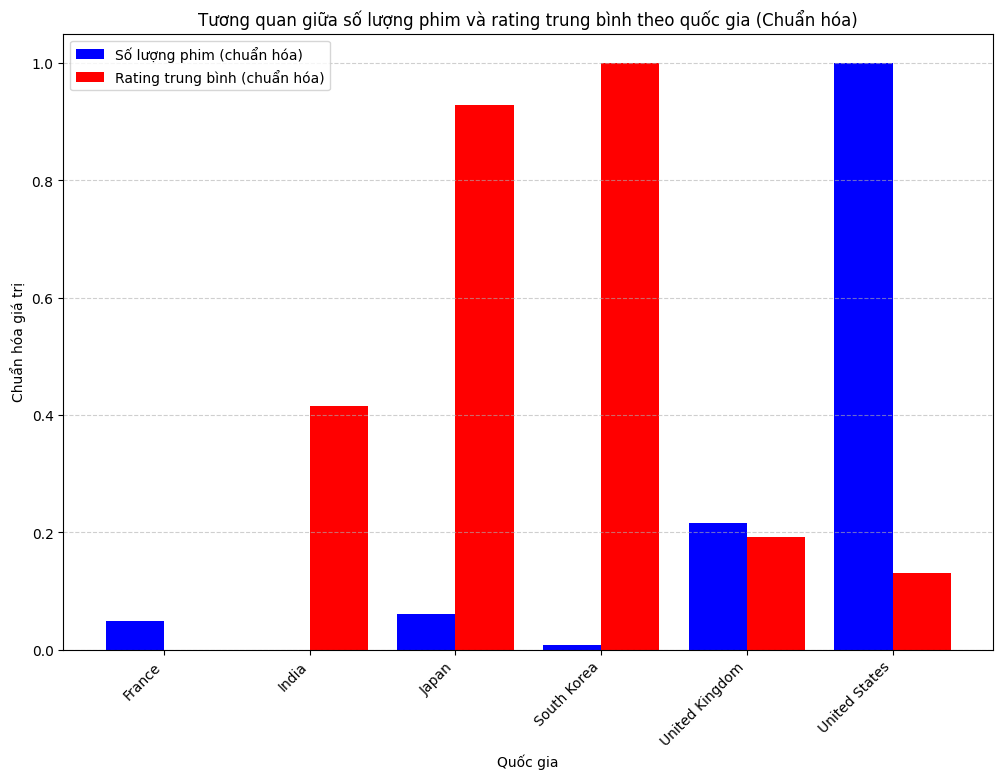

In [78]:
# Tính số lượng phim theo quốc gia
country_counts = filtered_df['countries'].value_counts()
country_ratings = filtered_df.groupby('countries')['rating'].mean()

# Tạo DataFrame mới
country_df = pd.DataFrame({'number_of_movies': country_counts, 'average_rating': country_ratings})

# Chuẩn hóa dữ liệu về khoảng [0,1]
scaler = MinMaxScaler()
country_df[['number_of_movies', 'average_rating']] = scaler.fit_transform(country_df[['number_of_movies', 'average_rating']])

# Thiết lập vị trí cột
countries = country_df.index
x = np.arange(len(countries))  # Vị trí các quốc gia
width = 0.4  # Độ rộng mỗi cột

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(12, 8))

# Cột số lượng phim (màu xanh)
bars1 = ax.bar(x - width/2, country_df['number_of_movies'], width, color='blue', label="Số lượng phim (chuẩn hóa)")

# Cột rating trung bình (màu đỏ)
bars2 = ax.bar(x + width/2, country_df['average_rating'], width, color='red', label="Rating trung bình (chuẩn hóa)")

# Cấu hình trục
ax.set_xlabel("Quốc gia")
ax.set_ylabel("Chuẩn hóa giá trị")
ax.set_title("Tương quan giữa số lượng phim và rating trung bình theo quốc gia (Chuẩn hóa)")
ax.set_xticks(x)
ax.set_xticklabels(countries, rotation=45, ha='right')

# Hiển thị chú thích
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Hiển thị biểu đồ
plt.show()

Số lượng phim ko quá ảnh hướng đến rating <br>
Tuy nhiên, các nước có số lượng phim quá lớn thường ko có rating cao

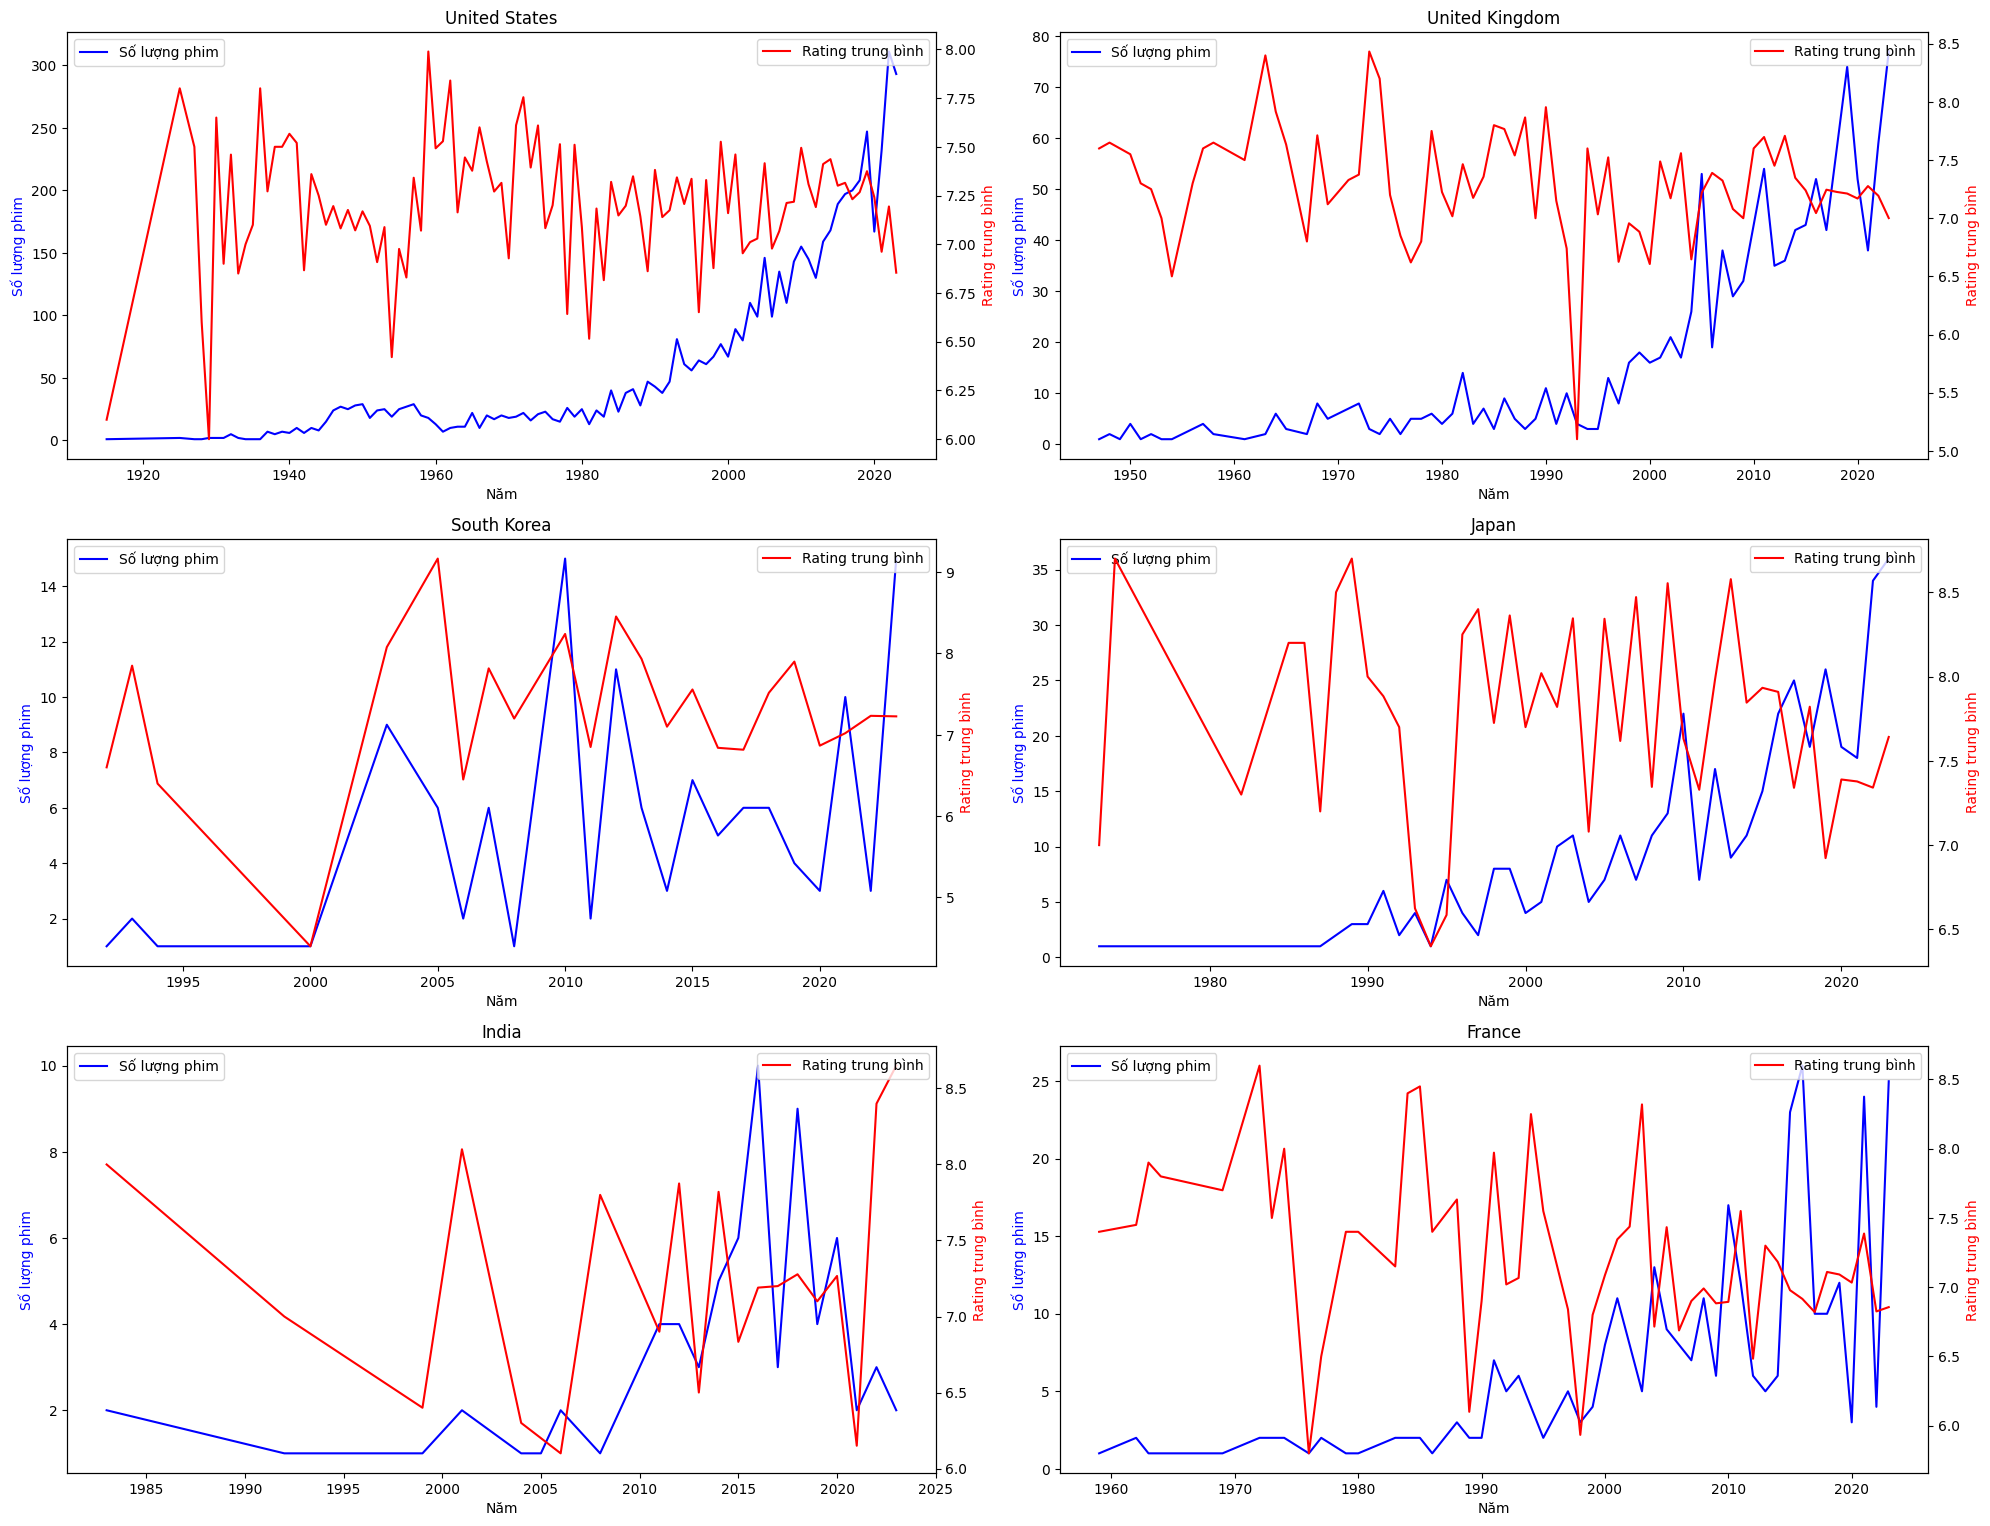

In [79]:
# Tạo một figure với các subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
axes = axes.flatten()

# Vẽ biểu đồ cho từng quốc gia
for i, country in enumerate(selected_countries):
    country_df = filtered_df[(filtered_df['countries'] == country) & (filtered_df['release_date'] < 2024)]

    # Tính số lượng phim theo năm
    year_counts = country_df.groupby('release_date').size()
    
    # Tính rating trung bình theo năm
    year_ratings = country_df.groupby('release_date')['rating'].mean()
    
    # Loại bỏ các hàng có giá trị NaN
    year_counts = year_counts.dropna()
    year_ratings = year_ratings.dropna()
    
    # Kiểm tra nếu có đủ dữ liệu để vẽ biểu đồ
    if not year_counts.empty and not year_ratings.empty:
        # Vẽ biểu đồ
        ax = axes[i]
        ax2 = ax.twinx()
        
        sns.lineplot(x=year_counts.index, y=year_counts.values, ax=ax, color='b', label='Số lượng phim')
        sns.lineplot(x=year_ratings.index, y=year_ratings.values, ax=ax2, color='r', label='Rating trung bình')
        
        ax.set_title(f'{country}')
        ax.set_xlabel('Năm')
        ax.set_ylabel('Số lượng phim', color='b')
        ax2.set_ylabel('Rating trung bình', color='r')
        
        ax.legend(loc='upper left')
        ax2.legend(loc='upper right')
    else:
        print(f"Không có đủ dữ liệu để vẽ biểu đồ cho {country}")

# Ẩn subplot thừa nếu có
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Nhận xét chung: 
- Xu hướng số lượng phim

United States, United Kingdom, Nhật Bản, Hàn Quốc, Pháp: Số lượng phim tăng dần theo thời gian, đặc biệt từ khoảng năm 2000 trở đi.
Ấn Độ: Xu hướng số lượng phim có vẻ dao động mạnh, không tăng ổn định như các quốc gia khác.
- Xu hướng rating trung bình

Hầu hết các quốc gia có rating trung bình dao động nhưng không có sự tăng giảm quá rõ rệt.
Một số quốc gia như Ấn Độ, Nhật Bản có rating trung bình cao hơn so với những nước khác.
- Mối quan hệ giữa số lượng phim và rating trung bình

Ở một số quốc gia như Mỹ và Anh, số lượng phim tăng mạnh nhưng rating trung bình không có xu hướng giảm, chứng tỏ chất lượng phim không bị ảnh hưởng tiêu cực khi số lượng phim tăng.
Ở Ấn Độ, số lượng phim có giai đoạn giảm nhưng rating trung bình vẫn duy trì ở mức cao, có thể do sự chọn lọc trong sản xuất phim chất lượng hơn.

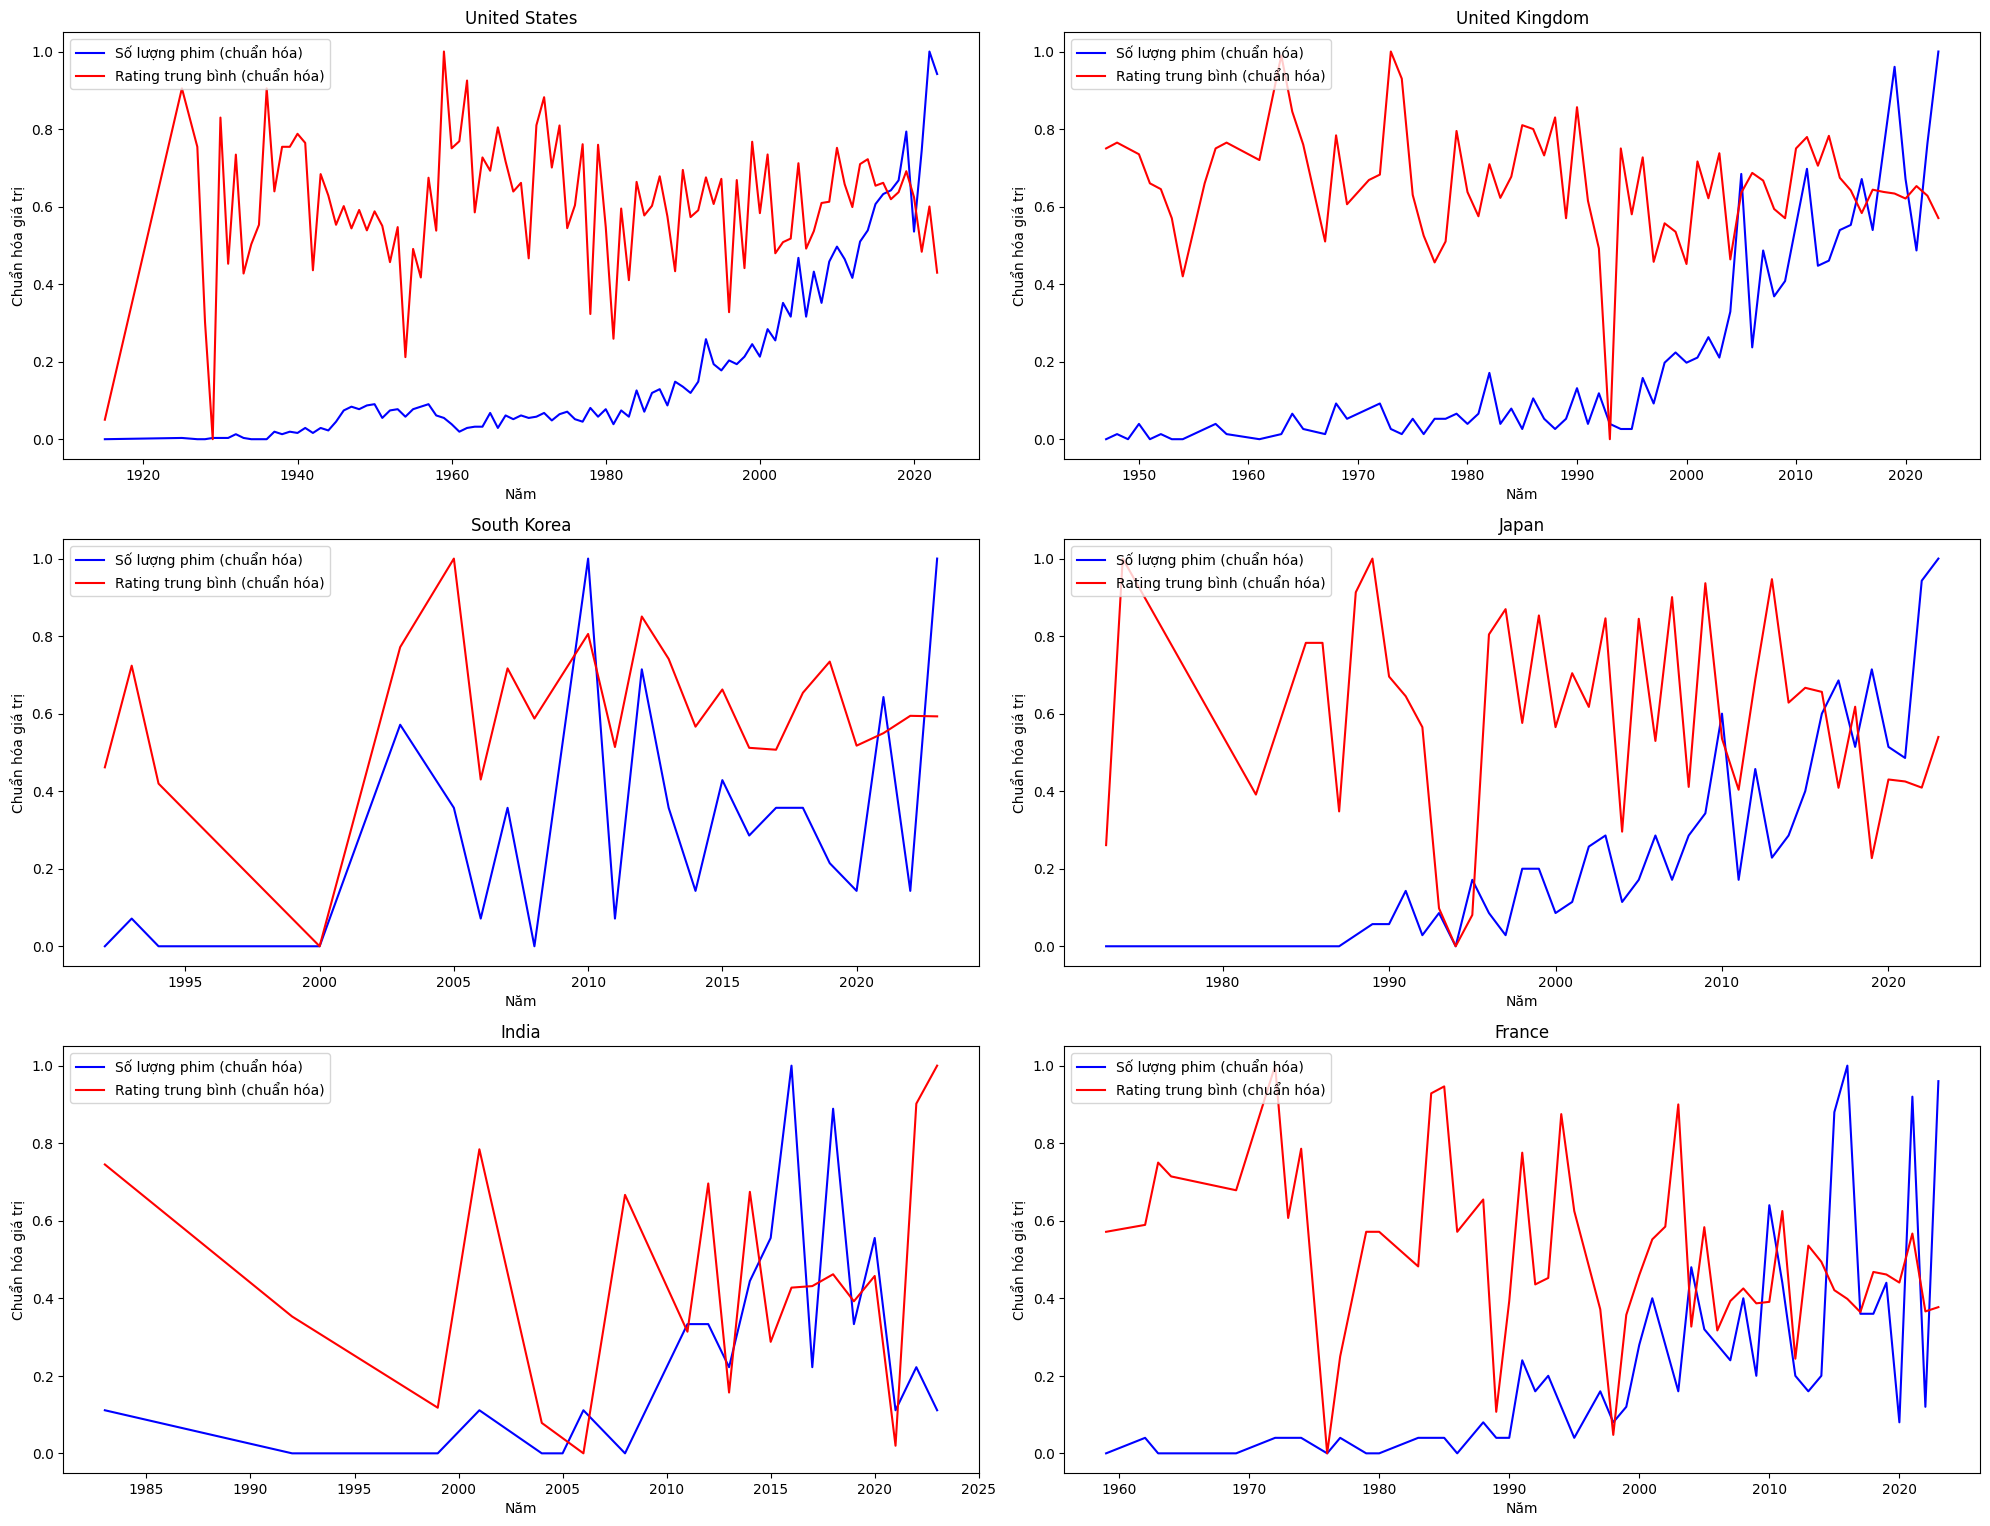

In [82]:
# Tạo một figure với các subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
axes = axes.flatten()

# Vẽ biểu đồ cho từng quốc gia
for i, country in enumerate(selected_countries):
    country_df = filtered_df[(filtered_df['countries'] == country) & (filtered_df['release_date'] < 2024)]

    # Tính số lượng phim theo năm
    year_counts = country_df.groupby('release_date').size()
    
    # Tính rating trung bình theo năm
    year_ratings = country_df.groupby('release_date')['rating'].mean()
    
    # Loại bỏ các hàng có giá trị NaN
    year_counts = year_counts.dropna()
    year_ratings = year_ratings.dropna()

    # Kiểm tra nếu có đủ dữ liệu để vẽ biểu đồ
    if not year_counts.empty and not year_ratings.empty:
        # Chuẩn hóa dữ liệu về khoảng [0,1] trên cùng một thang đo
        scaler = MinMaxScaler()
        normalized_data = scaler.fit_transform(pd.DataFrame({'number_of_movies': year_counts, 'average_rating': year_ratings}))

        year_counts_normalized = normalized_data[:, 0]  # Số lượng phim chuẩn hóa
        year_ratings_normalized = normalized_data[:, 1]  # Rating trung bình chuẩn hóa
        
        # Vẽ biểu đồ trên cùng một trục y
        ax = axes[i]
        sns.lineplot(x=year_counts.index, y=year_counts_normalized, ax=ax, color='b', label='Số lượng phim (chuẩn hóa)')
        sns.lineplot(x=year_ratings.index, y=year_ratings_normalized, ax=ax, color='r', label='Rating trung bình (chuẩn hóa)')
        
        ax.set_title(f'{country}')
        ax.set_xlabel('Năm')
        ax.set_ylabel('Chuẩn hóa giá trị')
        ax.legend(loc='upper left')
    else:
        print(f"Không có đủ dữ liệu để vẽ biểu đồ cho {country}")

# Ẩn subplot thừa nếu có
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Nhìn chung, đồ thị sau khi chuẩn hóa và trước khi chuẩn hóa ko có sự khác biệt quá rõ rệt<br>
### Đánh giá xu hướng(Sau khi chuẩn hóa):
- Xu hướng chung:

Số lượng phim (đường màu xanh) tăng lên rõ rệt theo thời gian ở Mỹ, Anh, Nhật Bản, Pháp, đặc biệt là sau năm 2000.
Hàn Quốc và Ấn Độ có xu hướng dao động mạnh, không ổn định như các nước còn lại.
- Tương quan giữa số lượng phim và rating trung bình:

Ở Mỹ, Anh, Nhật Bản, số lượng phim tăng mạnh nhưng rating trung bình (đường đỏ) dao động mà không giảm quá nhiều, chứng tỏ chất lượng phim không bị suy giảm khi sản xuất nhiều hơn.
Ở Hàn Quốc, có một số giai đoạn rating trung bình giảm khi số lượng phim tăng, cho thấy có thể có sự bão hòa về chất lượng.
Ấn Độ có một xu hướng thú vị: số lượng phim không tăng liên tục, nhưng rating trung bình có sự nhảy vọt trong một số giai đoạn.
- Sự khác biệt giữa các quốc gia:

Mỹ và Anh có sự ổn định về rating trung bình dù số lượng phim tăng nhanh.
Hàn Quốc và Nhật Bản có rating trung bình biến động mạnh, có thể do sự thay đổi về xu hướng sản xuất phim hoặc thị hiếu khán giả.
Pháp có sự dao động lớn trong cả hai chỉ số, cho thấy sự đa dạng về số lượng và chất lượng phim theo thời gian.

## Phân tích chi tiết tùng thể loại:

C:\Users\Admin\AppData\Local\Temp\ipykernel_23380\3422271318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['genres'] = filtered_df['genres'].str.split(', ')


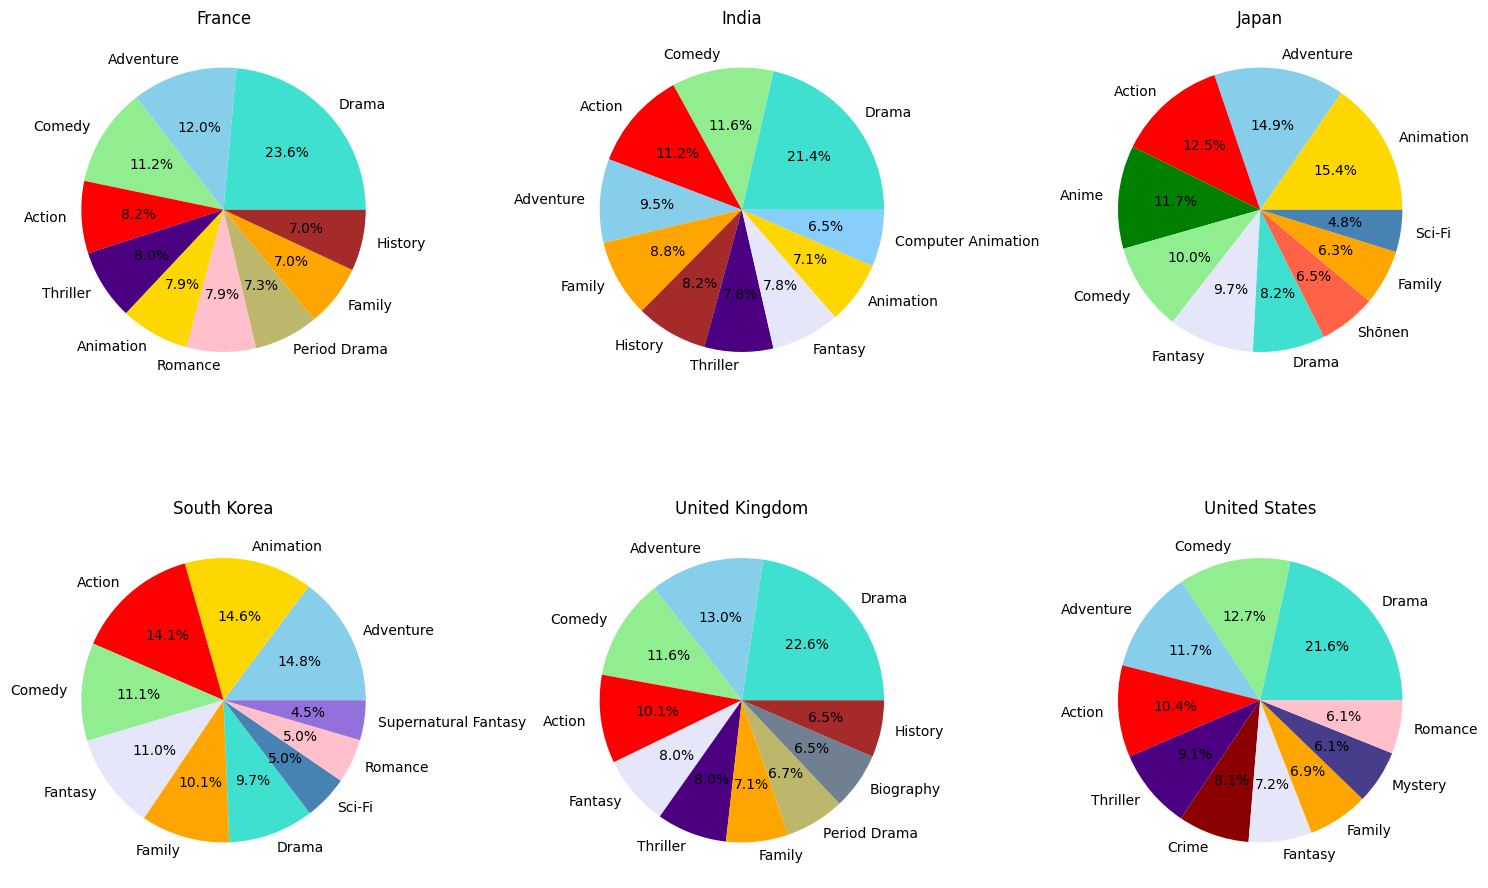

In [78]:
#Tách thể loạiloại
filtered_df['genres'] = filtered_df['genres'].str.split(', ')
filtered_df = filtered_df.explode('genres')

# Nhóm dữ liệu theo quốc gia và thể loại, sau đó đếm số lượng
genre_counts = filtered_df.groupby(['countries', 'genres']).size().unstack(fill_value=0)

# Xác định số lượng hàng và cột cho subplots
num_countries = len(genre_counts)
num_cols = 3
num_rows = int(np.ceil(num_countries / num_cols))

# Tạo dict màu cố định cho các genres
GENRE_COLORS = {
    'Action': 'Red',
    'Drama': 'Turquoise',
    'Adventure': 'SkyBlue',
    'Comedy': 'LightGreen',
    'Horror': 'Purple',
    'Western': 'Tan',
    'Animation': 'Gold',
    'Romance': 'Pink',
    'Thriller': 'Indigo',
    'Crime': 'DarkRed',
    'Documentary': 'Olive',
    'Fantasy': 'Lavender',
    'Sci-Fi': 'SteelBlue',
    'Family': 'Orange',
    'History': 'Brown',
    'Period Drama': 'DarkKhaki',
    'Biography': 'SlateGray',
    'Mystery': 'DarkSlateBlue',
    'Shōnen': 'Tomato',
    'Anime': 'Green',
    'Computer Animation': 'LightSkyBlue',
    'Supernatural Fantasy': 'MediumPurple',
    'Other' : 'Gray'
}

# Vẽ biểu đồ tròn cho từng quốc gia
fig, axes = plt.subplots(nrows= num_rows, ncols= num_cols , figsize=(15, 5 * num_rows))

# Flatten axes array for easy iteration
axes = axes.flatten()

for ax, (country, row) in zip(axes, genre_counts.iterrows()):
    # Lấy 10 thể loại phổ biến nhất
    top_genres = row.sort_values(ascending=False).head(10)
    
    # Lấy màu tương ứng cho từng genre trong data
    colors = [GENRE_COLORS.get(genre, GENRE_COLORS['Other']) for genre in top_genres.index]
    
    # Vẽ pie chart
    ax.pie(top_genres, labels=top_genres.index, autopct='%1.1f%%', colors=colors)
    ax.set_title(country)

# Ẩn các subplot thừa nếu có
for i in range(num_countries, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

### Kết luận:
Thể loại action và comedy được ưa chuộng ở hầu hết các quốc gia.<br>
Thể loại anime gần như chỉ có Nhật Bản sản xuất. <br>
Thể loại drama được ưa chuộng ở các quốc gia phương Tây và Ấn độ. <br>
Còn Nhật Bản và Hàn Quốc ưa chuộng thể loại Adventure (phiêu lưu) và phim hoạt hình (animation). <br>

### Xem quốc gia nào làm tốt trong những thể loại nào nhất

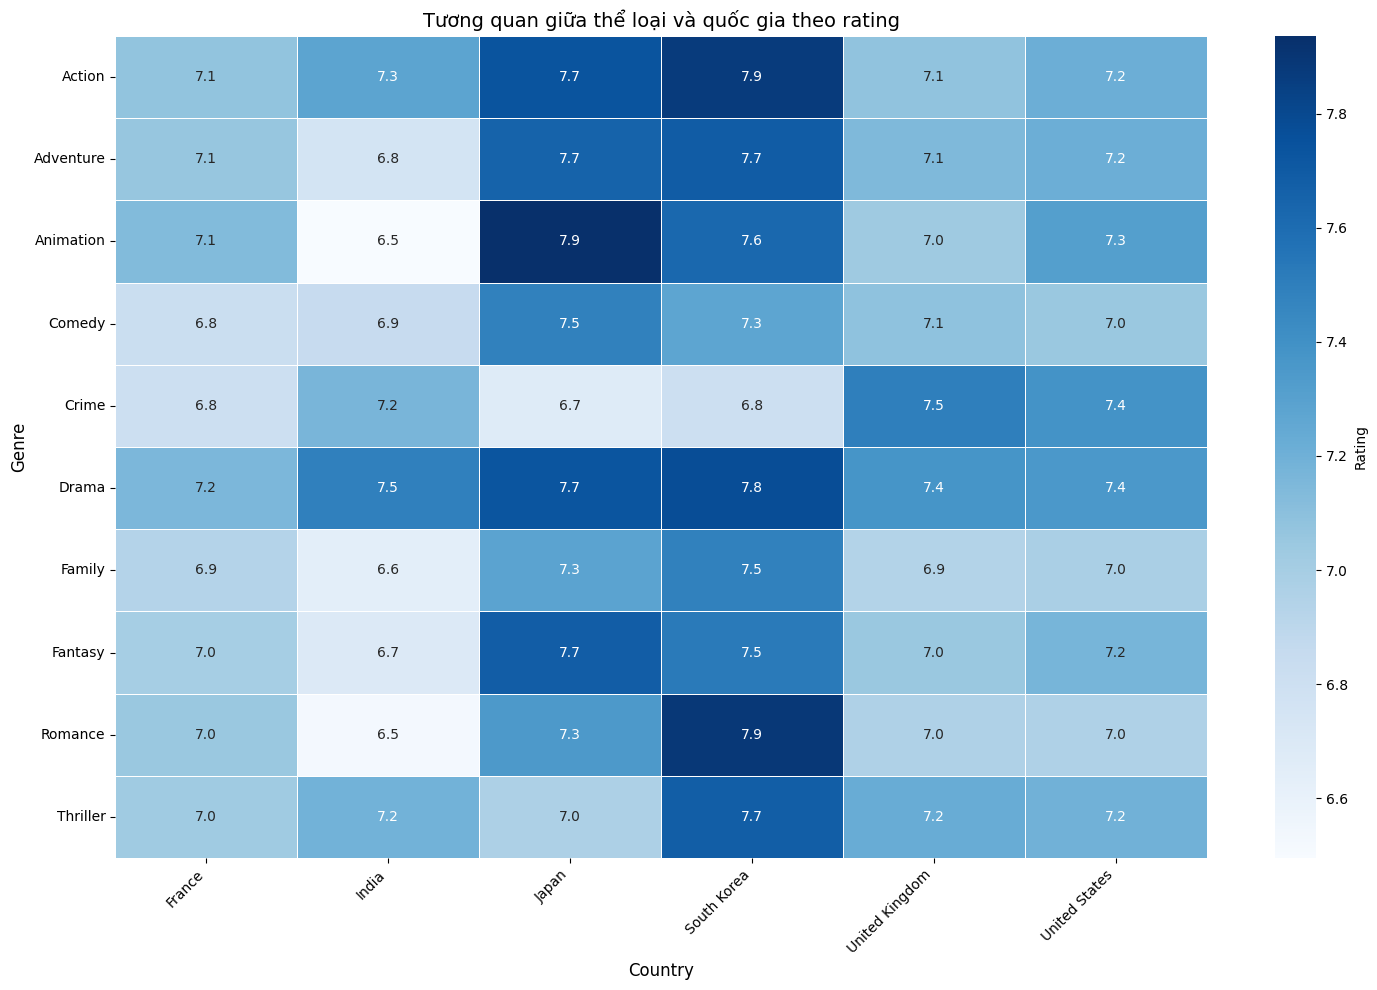


Top 5 thể loại có rating cao nhất theo từng quốc gia:

France:
Drama: 7.16
Animation: 7.14
Action: 7.08
Adventure: 7.06
Romance: 7.05

India:
Drama: 7.50
Action: 7.28
Thriller: 7.19
Crime: 7.17
Comedy: 6.85

Japan:
Animation: 7.94
Action: 7.74
Drama: 7.73
Fantasy: 7.69
Adventure: 7.65

South Korea:
Romance: 7.89
Action: 7.87
Drama: 7.78
Adventure: 7.69
Thriller: 7.68

United Kingdom:
Crime: 7.50
Drama: 7.37
Thriller: 7.23
Adventure: 7.14
Comedy: 7.09

United States:
Crime: 7.39
Drama: 7.35
Animation: 7.31
Action: 7.21
Adventure: 7.21


In [79]:
# Tách các thể loại thành danh sách và explode để tạo dòng mới
df['genres'] = df['genres'].str.split(', ')

# Lọc dữ liệu cho 6 quốc gia
genre_country_rating = df[df['countries'].isin(selected_countries)].explode('genres')[['genres', 'countries', 'rating']].rename(
    columns={'genres': 'genre', 'countries': 'country'}
)

# Xử lý giá trị NaN nếu có
genre_country_rating.dropna(subset=['rating'], inplace=True)

# Lấy 10 thể loại phổ biến nhất
top_10_genres = genre_country_rating['genre'].value_counts().head(10).index

# Lọc dữ liệu cho 10 thể loại phổ biến nhất
genre_country_rating = genre_country_rating[genre_country_rating['genre'].isin(top_10_genres)]

# Tính rating trung bình cho mỗi thể loại-quốc gia
avg_ratings = genre_country_rating.groupby(['genre', 'country'], as_index=False)['rating'].mean()

# Pivot table để tạo ma trận rating
rating_matrix = avg_ratings.pivot(index='genre', columns='country', values='rating')

# Vẽ heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(rating_matrix, annot=True, fmt='.1f', cmap='Blues',
            linewidths=0.5, cbar_kws={'label': 'Rating'})
plt.title('Tương quan giữa thể loại và quốc gia theo rating', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Lấy top 5 thể loại có rating cao nhất theo quốc gia
top_genres = avg_ratings.sort_values('rating', ascending=False).groupby('country').head(5)

print("\nTop 5 thể loại có rating cao nhất theo từng quốc gia:")
for country, group in top_genres.groupby('country'):
    print(f"\n{country}:")
    for _, row in group.iterrows():
        print(f"{row['genre']}: {row['rating']:.2f}")


### Nhận xét điểm đặc biệt trong đồ thị:
Nhật Bản có điểm Animation cao nhất (7.9) → Phù hợp với thế mạnh của Anime.<br>
Hàn Quốc có điểm Romance cao nhất (7.9) → Phim tình cảm Hàn Quốc được đánh giá rất cao.<br>
Ấn Độ có điểm Animation thấp nhất (6.5) → Thể loại này không phổ biến hoặc chất lượng chưa cao.<br>
Anh và Mỹ có điểm Crime khá cao (7.4 - 7.5) → Thể loại phim trinh thám/tội phạm được yêu thích.<br>
Drama có điểm số ổn định ở nhiều quốc gia (7.2 - 7.8) → Là thể loại phổ biến và có chất lượng đồng đều.<br>
- Nhìn chung dữ liệu thể hiện khá đúng với dự đoán/ thực tế.